In [31]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price. using the past 60 day stock price.

# Import Packages

In [32]:
# Import Libraries
import datetime as dt
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Get APPLE Data

In [33]:
# We would like all available data from 09/01/2019 until 09/18/2021.
startdate = '2019-09-01'
enddate =  '2021-09-18'

df = web.DataReader('AAPL', data_source='yahoo', start = startdate, end = enddate)

In [34]:
#Show the data from the data frame
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-03,51.744999,51.055000,51.607498,51.424999,80092000.0,50.594368
2019-09-04,52.369999,51.830002,52.097500,52.297501,76752400.0,51.452774
2019-09-05,53.492500,52.877499,53.000000,53.320000,95654800.0,52.458755
2019-09-06,53.605000,53.127499,53.512501,53.314999,77449200.0,52.453838
2019-09-09,54.110001,52.767502,53.709999,53.542500,109237600.0,52.677666
...,...,...,...,...,...,...
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,148.119995
2021-09-15,149.440002,146.369995,148.559998,149.029999,83281300.0,149.029999


In [35]:
#Get the number of rows and columns in the data set
#number of Trading days
df.shape

(516, 6)

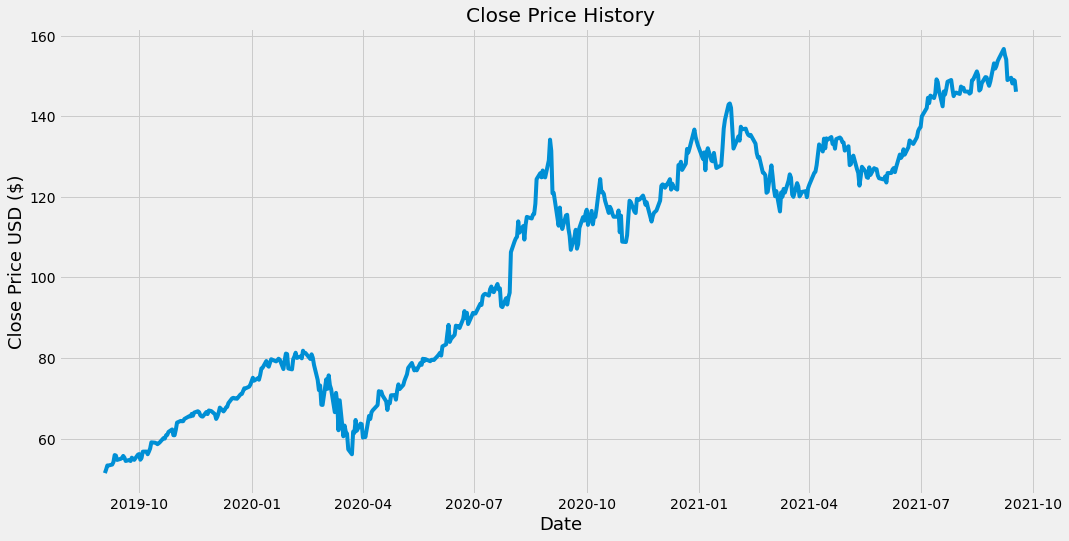

In [36]:
#Visualize the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [37]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len =math.ceil(len(dataset)*0.8)

In [38]:
training_data_len

413

In [39]:
#Scale the data. Apply preprocessing scaling
scaler = MinMaxScaler(feature_range=(0,1))
# Will hold the dataset that is now Scale
scaled_data = scaler.fit_transform(dataset)
# fit_transformcompute the min and max values used for scaling and transform the data base on 0,1
scaled_data

array([[0.        ],
       [0.00828862],
       [0.01800219],
       [0.01795468],
       [0.0201159 ],
       [0.02612454],
       [0.042488  ],
       [0.04130052],
       [0.03099321],
       [0.0337244 ],
       [0.03562438],
       [0.04054056],
       [0.03624189],
       [0.02857075],
       [0.03092197],
       [0.02845199],
       [0.03640812],
       [0.03370067],
       [0.03115948],
       [0.0433905 ],
       [0.04486296],
       [0.03149197],
       [0.0359094 ],
       [0.05061036],
       [0.05072911],
       [0.04441171],
       [0.05065787],
       [0.05792523],
       [0.07246   ],
       [0.07165249],
       [0.07034629],
       [0.06809005],
       [0.07025127],
       [0.07293499],
       [0.08267229],
       [0.0813661 ],
       [0.08901343],
       [0.08996343],
       [0.09708831],
       [0.10295446],
       [0.08927468],
       [0.08920343],
       [0.1022657 ],
       [0.11903294],
       [0.12302285],
       [0.12214413],
       [0.12240534],
       [0.127

In [40]:
#Create the training data set
#Created the scaled training dataset

train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if (i <= 61):
        print(x_train)
        print(y_train)
       

[array([0.        , 0.00828862, 0.01800219, 0.01795468, 0.0201159 ,
       0.02612454, 0.042488  , 0.04130052, 0.03099321, 0.0337244 ,
       0.03562438, 0.04054056, 0.03624189, 0.02857075, 0.03092197,
       0.02845199, 0.03640812, 0.03370067, 0.03115948, 0.0433905 ,
       0.04486296, 0.03149197, 0.0359094 , 0.05061036, 0.05072911,
       0.04441171, 0.05065787, 0.05792523, 0.07246   , 0.07165249,
       0.07034629, 0.06809005, 0.07025127, 0.07293499, 0.08267229,
       0.0813661 , 0.08901343, 0.08996343, 0.09708831, 0.10295446,
       0.08927468, 0.08920343, 0.1022657 , 0.11903294, 0.12302285,
       0.12214413, 0.12240534, 0.1276065 , 0.12929278, 0.13418518,
       0.13361514, 0.13957631, 0.13523017, 0.14264003, 0.14582247,
       0.14389875, 0.13653637, 0.13373394, 0.13318767, 0.14408872])]
[0.13914883820157642]
[array([0.        , 0.00828862, 0.01800219, 0.01795468, 0.0201159 ,
       0.02612454, 0.042488  , 0.04130052, 0.03099321, 0.0337244 ,
       0.03562438, 0.04054056, 0.036

In [41]:
#Conver the x_train and y_train to numpy arrays, so we can use to train the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [42]:
#Reshape the data, why? LSTM network expects the input to be tri-dimensional in the form of number of 
# examples, number of time steps and number of features and now the dataset is two-dimensional so 
# we need to reshape
x_train.shape
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [43]:
x_train.shape

(353, 60, 1)

In [44]:
#Build the LMST Model architecture
model = Sequential()
#will have 50 neurons 
model.add(LSTM(50, return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
#add Dense layer with 25 neurons
model.add(Dense(25))
model.add(Dense(1))

In [45]:
#Compile the model. the optimizer is used to optimize unto the loss function and the loss function
# measure how well the model did on training
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [46]:
#Train the model. fit is another name for train
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

353/353 [==============================] - 14s 31ms/step - loss: 0.0086


In [47]:
#Create the testing dataset
#Create a new array containing scaled values from index 1888 to 2435
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets for x_test and y_test
x_test = []
# y_test contains all the values that our model wants to predicts
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [48]:
#Convert the data to a numpy array so we can used in our LSTMS model
x_test = np.array(x_test) 

In [49]:
#Reshape the data
#number of samples = x_test.shape[0]
#number of columns = x_test.shape[1]
#number of features = 1 (close price)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [50]:
#Get the model predicted price values
predictions = model.predict(x_test)
#unscaling the values to contain the same values as y_test dataset
predictions = scaler.inverse_transform(predictions)

In [51]:
#Get the root mean square error (RMSE)-standard deviasion of the residual to get and idea how well
#your model perform
rmse = np.sqrt(((predictions - y_test)**2).mean())

In [52]:
rmse

12.560430931979228

<ipython-input-53-8bd03a8f0a47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

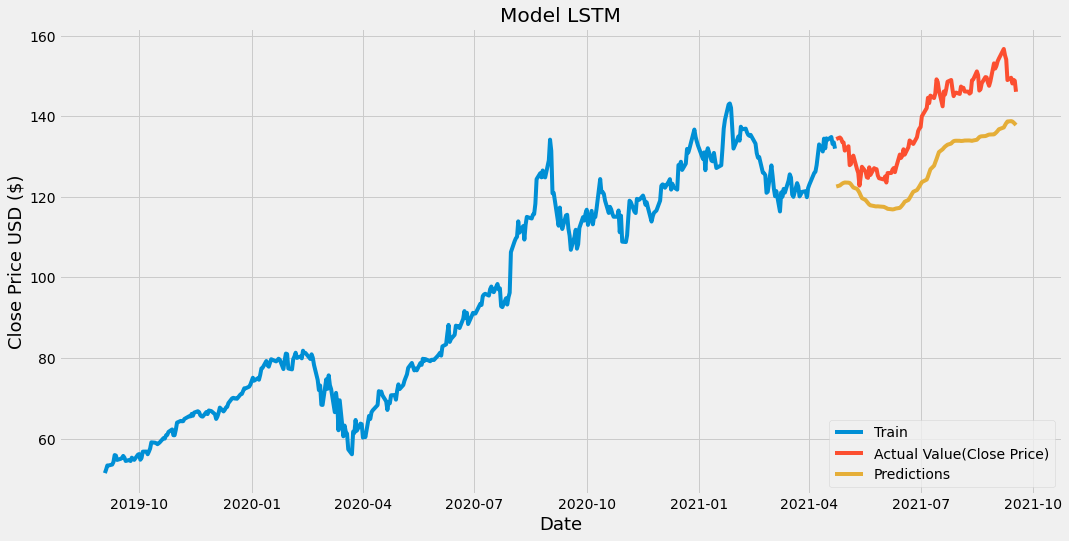

In [53]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Value(Close Price)', 'Predictions'], loc='lower right')
plt.show


In [54]:
#Show the Valid and Predicted Prices
valid

,Close,Predictions
Date,,
2021-04-23,134.320007,122.545204
2021-04-26,134.720001,122.806328
2021-04-27,134.389999,123.064682
2021-04-28,133.580002,123.290817
2021-04-29,133.479996,123.445732
...,...,...
2021-09-13,149.550003,138.772873
2021-09-14,148.119995,138.688599
2021-09-15,149.029999,138.433365


In [58]:
train

,Close
Date,
2019-09-03,51.424999
2019-09-04,52.297501
2019-09-05,53.320000
2019-09-06,53.314999
2019-09-09,53.542500
...,...
2021-04-16,134.160004
2021-04-19,134.839996
2021-04-20,133.110001


In [55]:
#Predict the Closing Price of APPLE
#Get the quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = startdate, end = enddate )
apple_quote

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-03,51.744999,51.055000,51.607498,51.424999,80092000.0,50.594368
2019-09-04,52.369999,51.830002,52.097500,52.297501,76752400.0,51.452774
2019-09-05,53.492500,52.877499,53.000000,53.320000,95654800.0,52.458755
2019-09-06,53.605000,53.127499,53.512501,53.314999,77449200.0,52.453838
2019-09-09,54.110001,52.767502,53.709999,53.542500,109237600.0,52.677666
...,...,...,...,...,...,...
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,148.119995
2021-09-15,149.440002,146.369995,148.559998,149.029999,83281300.0,149.029999


In [56]:
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to numpy array
last_60_days = new_df[-60:].values
#scale the data to be values betwwen 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create and empty list
X_test = []
#append the last 60 days
X_test.append(last_60_days_scaled)
#convert the x_test data to set a numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[137.35764]]


In [57]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2021-09-17', end = '2021-09-17' )
print(apple_quote2['Close'])

Date
2021-09-17    146.059998
Name: Close, dtype: float64
